# Step 1 - Read csv file

In [170]:
import pandas as pd

In [171]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [172]:
df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


# Step 2 - drop unnecessary columns

In [173]:
df.drop(["availability","area_type","society","balcony"],axis=1,inplace=True)

# Step 3 - check null values and drop if null values are less comparing to overall rows

In [174]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [175]:
df.dropna(inplace=True)

In [176]:
df.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Step 4 - Change categorical "size" feature to numerical by split method 

In [177]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [178]:
df["bhk"]=df["size"].apply(lambda x: x.split(" ")[0])

In [179]:
df["bhk"]=df["bhk"].astype(int)

In [180]:
df.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


# Step 5 - In feature "total_sqft" we separate values which are in range with normal floating values 

In [181]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [182]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [183]:
df[~df["total_sqft"].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


# Step 6 - Taking average in "total_sqft" feature where the feature values are in certain range 

In [184]:
def average(x):
    lst = x.split("-")
    if len(lst)==2:
        averagee = ((float(lst[0]))+(float(lst[1])))/2
        return averagee
    try:
        return float(x)
    except:
        return None

In [185]:
average('34.0')

34.0

In [186]:
df["total_sqft"]=df["total_sqft"].apply(average)

In [187]:
df = df[df.total_sqft.notnull()]

In [188]:
df.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [189]:
df.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [190]:
df.dropna(inplace=True)

In [191]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [192]:
df.head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556


# Step 7 - Grouping the feature "location" with freq. count of each value in location feature in order to reduce the dimensionality of this feature

In [193]:
#group_location = df.groupby("location")["location"].agg("count").sort_values(ascending=False)

In [194]:
group_location = df["location"].value_counts(ascending=False)

In [195]:
group_location

Whitefield                   532
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: location, Length: 1298, dtype: int64

In [196]:
location_less_10 = group_location[group_location<=10]
location_less_10

Ganga Nagar                  10
Nagappa Reddy Layout         10
Naganathapura                10
Sadashiva Nagar              10
Basapura                     10
                             ..
Indiranagar HAL 2nd Stage     1
Maruthi HBCS Layout           1
K R C kothanur                1
1Channasandra                 1
Abshot Layout                 1
Name: location, Length: 1058, dtype: int64

# Step 8 - Changing the feature "location" values of count less than 10 to "Other"

In [197]:
df["location"]=df["location"].apply(lambda x: "other" if x in location_less_10 else x)

In [198]:
df["location"].value_counts()

other                        2887
Whitefield                    532
Sarjapur  Road                392
Electronic City               302
Kanakpura Road                264
                             ... 
Pattandur Agrahara             11
2nd Phase Judicial Layout      11
Bommenahalli                   11
Marsur                         11
LB Shastri Nagar               11
Name: location, Length: 241, dtype: int64

In [199]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.3+ MB


# Step 9 - Removing the outliers of anomalies 
Features : based on total_sqft and bhk we remove outliers of unusuals like:Which Number of bhkss in total_sqft is unusual (For example having 2bhk less than 600sqft is unusual, because min sqft as per majority real estate is around 300sqft per bedroom )

Features : PRICE

In [201]:
df[((df["total_sqft"]/df["bhk"])<300)].head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810


In [202]:
#Clearly we can see that 8 bhk is in 600sqft which is not possible. So I removed this.

In [203]:
df = df[~((df["total_sqft"]/df["bhk"])<300)]
df.shape

(12456, 7)

In [204]:
# Feature : price feature outliers

In [205]:
# Creating groupby dataframe to remove the outliers of price feature using location feature and after removing we store the remaining values in new dataframe..

In [206]:
a = df.groupby("location")
a.first(3)

,total_sqft,bath,price,bhk,price_per_sqft
location,,,,,
Devarachikkanahalli,1250.0,2.0,44.00,3,3520.000000
1st Block Jayanagar,2850.0,4.0,428.00,4,15017.543860
1st Phase JP Nagar,2825.0,4.0,250.00,4,8849.557522
2nd Phase Judicial Layout,1450.0,2.0,50.75,3,3500.000000
2nd Stage Nagarbhavi,1500.0,4.0,220.00,4,14666.666667
...,...,...,...,...,...
Yelahanka,2475.0,4.0,186.00,4,7515.151515
Yelahanka New Town,650.0,1.0,33.00,1,5076.923077
Yelenahalli,1240.0,2.0,47.12,2,3800.000000


In [207]:
import numpy as np
new_df = pd.DataFrame()
for location,location_params in a:
    meann = np.mean(location_params.price_per_sqft)
    std = np.std(location_params.price_per_sqft)
    new = location_params[(location_params["price_per_sqft"]>meann-std)&(location_params["price_per_sqft"]<meann+std)]
    new_df = pd.concat([new_df,new],ignore_index=True)

In [208]:
new_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Devarachikkanahalli,3 BHK,1250.0,2.0,44.00,3,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.00,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.00,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.00,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.00,3,4561.403509
...,...,...,...,...,...,...,...
10240,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10241,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10242,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10243,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [209]:
new_df.shape

(10245, 7)

# Step 10 - Data visualisation to view outliers of feature bhk and price. In the dataset sometimes 2bhk has more price than 3bhk so we can view those by graphs

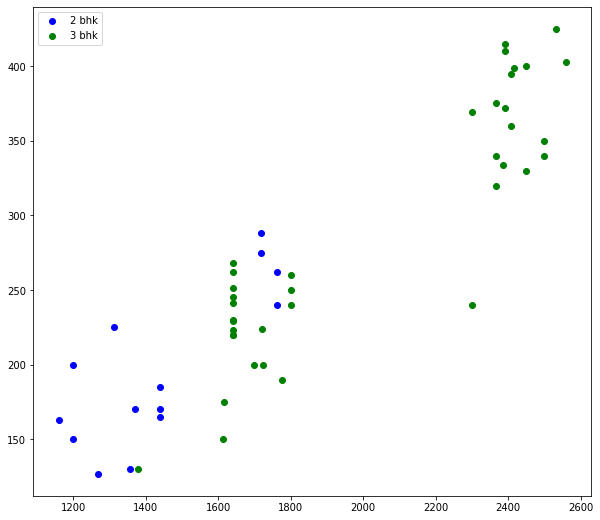

In [210]:
import matplotlib.pyplot as plt
def pplot(location_,df):
    bhk_2 = df[(df.location==location_)&(df.bhk==2)]
    bhk_3 = df[(df.location==location_)&(df.bhk==3)]
    plt.scatter(bhk_2.total_sqft,bhk_2.price,color="blue",label="2 bhk")
    plt.scatter(bhk_3.total_sqft,bhk_3.price,color="green",label="3 bhk")
    plt.legend()
    #fig size 
    plt.rcParams["figure.figsize"]=(10,9)
pplot("Rajaji Nagar",new_df)

In [211]:
df = new_df.copy()
def remove_outliers(df):
    exclude = np.array([])
    for loc,locat in df.groupby("location"):
        bhk_stats={}
        for bhk,bhk__ in locat.groupby("bhk"):
            bhk_stats[bhk]={
            "mean": np.mean(bhk__.price_per_sqft),
            "std": np.std(bhk__.price_per_sqft),
            "count": bhk__.shape[0]
            }
        for bhk,bhk__ in locat.groupby("bhk"):
            stats = bhk_stats.get(bhk-1)
            if stats and stats["count"]>5:
                exclude = np.append(exclude,bhk__[bhk__.price_per_sqft<(stats["mean"])].index.values)
    return df.drop(exclude,axis="index")

In [212]:
df1 = remove_outliers(df)
df1.shape

(7331, 7)

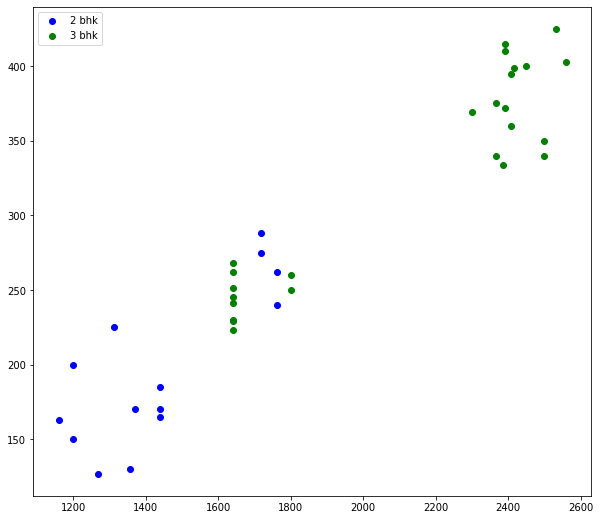

In [213]:
pplot("Rajaji Nagar",df1)

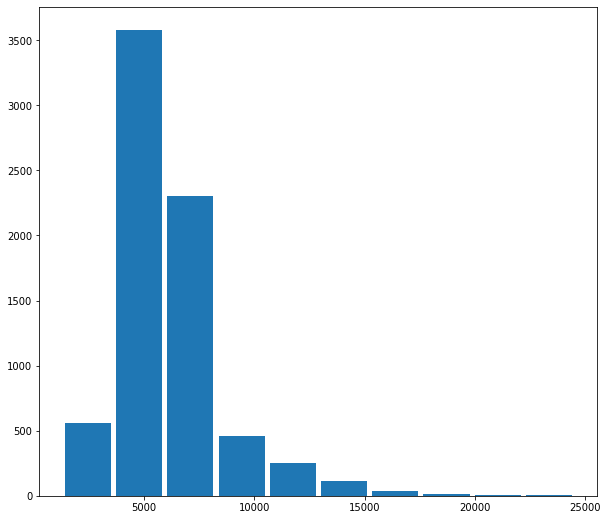

In [214]:
plt.hist(df1.price_per_sqft,rwidth=0.9)
plt.show()

# Step 11 - Removing outliers in bhk feature

In [215]:
df1[df1["bath"]>(df1["bhk"]+2)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5232,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6702,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8402,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [216]:
df2 = df1[df1["bath"]<(df1["bhk"]+2)]

In [217]:
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.654699
...,...,...,...,...,...,...,...
10236,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10237,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10240,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10241,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


# Step 12 - Dropping the "size" feature where already feature engineering has taken place.

In [218]:
df2.drop(["size","price_per_sqft"],axis=1,inplace=True)

/var/folders/w8/s5t40zys2lg2hxnvvxxnyqdm0000gn/T/ipykernel_36007/4195147401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(["size","price_per_sqft"],axis=1,inplace=True)


In [219]:
df = df2.copy()

# Step 13 - Transforming location categorical feature to multiple numerical feature using get_dummies

In [220]:
dum = pd.get_dummies(df.location)

In [221]:
dum = dum.astype(int)

In [222]:
dum.drop(["other"],axis=1,inplace=True)

In [223]:
final_df  = pd.concat([df,dum],axis=1)

In [224]:
final_df.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
final_df.drop(["location"],axis=1,inplace=True)

In [226]:
final_df

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10240,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10241,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
df = final_df.copy()

# Step 14 - Now that final_df is ready to fit for model building 

In [228]:
X = df.drop(["price"],axis=1)

In [229]:
y = df.price

In [230]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [231]:
from sklearn.linear_model import LinearRegression

In [232]:
LR = LinearRegression()

In [233]:
LR.fit(X_train,y_train)

LinearRegression()

In [234]:
LR.score(X_test,y_test)

0.8595687461071801

In [263]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5,test_size=0.2)
a = cross_val_score(LinearRegression(),X,y,cv=cv)
a.mean()

0.8119941698893992

In [264]:
#Checking which model with params gives better results

In [265]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def best_model_cv(X,y):
    models = {
    "Linear_Regression":
    {
        "model":LinearRegression(),
        "params":{
            "normalize":[True,False]
        }
    },
    "Lasso":{
        "model":Lasso(),
        "params":{
            "alpha":[1,2],
            "selection":["cyclic","random"]
        }
    },
    "Decision_Tree":{
        "model":DecisionTreeRegressor(),
        "params":{
            "criterion":["mse", "friedman_mse"],
            "splitter":["best", "random"]
            
        }
    }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2)
    for model,modelm in models.items():
        b = GridSearchCV(modelm["model"],modelm["params"],cv=cv,return_train_score=False)
        b.fit(X,y)
        scores.append({
        "model_name":model,
        "best_score":b.best_score_,
        "best_params":b.best_params_})
    return pd.DataFrame(scores)

In [266]:
import warnings
warnings.filterwarnings("ignore")
best_model_cv(X,y)

,model_name,best_score,best_params
0,Linear_Regression,0.811634,{'normalize': False}
1,Lasso,0.680662,"{'alpha': 1, 'selection': 'random'}"
2,Decision_Tree,0.758663,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [267]:
# Testing the trained model using predict_price function

In [256]:
X.columns

Index(['total_sqft', 'bath', 'bhk', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [257]:
np.where(X.columns=="2nd Stage Nagarbhavi")

(array([7]),)

In [258]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index >= 0:
        x[loc_index]=1
    print(x)
    return LR.predict([x])[0]

In [259]:
predict_price("2nd Stage Nagarbhavi",1000,3,5)

[1000.    3.    5.    0.    0.    0.    0.    1.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.   

186.85955959577666

In [260]:
import pickle

In [261]:
with open("model.pickle","wb") as f:
    pickle.dump(LR,f)

In [262]:
import json
a = {
    "data_columns":[col.lower() for col in X.columns]
}

with open("columns.json","w") as f:
    f.write(json.dumps(a))